# Machine Learning

## 8️⃣Classification Algorithms

### Logistic Regression

**General regression algorithm** can't be used for **classification problems** because linear regression can have values from negative inifinity to infinity.

The regression in which the **range of output values is modified** to apply linear regression to the classification problem is called **Logistic Regression**.

#### Sigmoid (logistic) function

<img src="./sigmoid.png" width = "300">

$$g(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{1+e^x}$$

To modify output value to be between 0 and 1, Logistic Regression use **Sigmoid function**.

**Decision Boundary** refers to a reference value for classifying data. Data is generally classified based on the output value of 0.5.

In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# Function for plot
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()

Result of prediction : [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


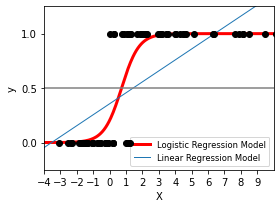

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

def load_data():
    
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y
"""
1. Create Logistic Regression model and train the model. 
   
   Step01. Load data using load_data()
   
   Step02. Initialize Logistic Regression model
   
   Step03. Train the model using Train data
   
   Step04. Predict the value using Test data
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data();
    
    logistic_model = LogisticRegression();
    
    logistic_model.fit(train_X, train_y)
    
    predicted = logistic_model.predict(test_X)
    
    print("Result of prediction :", predicted[:10])
    
    plot_logistic_regression(logistic_model, train_X, train_y)
    
    return logistic_model

if __name__ == "__main__":
    main()


### SVM(Support Vector Machine)

<img src = "./two_dimensions.png" width = "300">

**SVM** is used for binary classification problem where data are classified by two features. This model defines optimal **Deicision Boundary**, which is the boundary **as far away as possible from the data group**.

- Support Vector & Margin

<img src = "./support_vector.png" width="300">

**Support Vectors** are data points that are closest to decision boundary.   
**Margin** is the width of decision boundary.

- Hard Margin vs Soft Margin

It is called **hard margin** to not allow outliers to be included in the division boundary. Hard margin can cause **overfitting** problem.   
On the other hand, **soft margin** allows outliers to exist to some extent in the margin.



In [6]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
"""
1. Load data & split data
"""
def load_data():
    
    data = pd.read_csv('./dataset.csv')
    
    X = data.drop(columns=['Class'])
    y = data['Class']
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
    print(X, y)
    return train_X, test_X, train_y, test_y
    
"""
2. Initialize SVM model, train it, then return predicted value. 
"""
def SVM(train_X, test_X, train_y, test_y):
    
    svm = SVC()
    
    svm.fit(train_X, train_y)
    
    pred_y = svm.predict(test_X)
    
    return pred_y
    
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    pred_y = SVM(train_X, test_X, train_y, test_y)
    
    # print confusion matrix and report
    print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
    print("\nReport : \n",classification_report(test_y,pred_y)) 

if __name__ == "__main__":
    main()


      Factor01   Factor2   Factor3  Factor4
0      4.67650  -3.38950   3.48960  1.47710
1      2.67190   3.06460   0.37158  0.58619
2      0.80355   2.84730   4.34390  0.60170
3      1.44790  -4.87940   8.34280 -2.10860
4      5.24230  11.02720  -4.35300 -4.10130
...        ...       ...       ...      ...
1367   0.40614   1.34920  -1.45010 -0.55949
1368  -1.38870  -4.87730   6.47740  0.34179
1369  -3.75030 -13.45860  17.59320 -2.77710
1370  -3.56370  -8.38270  12.39300 -1.28230
1371  -2.54190  -0.65804   2.68420  1.19520

[1372 rows x 4 columns] 0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

Confusion matrix : 
 [[157   0]
 [  0 118]]

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.0

### Naive Bayes Classification

**Naive Bayes classification** is a classification algorithm using Bayes Theorem assuming that each feature is independent.

**Bayes Theorem** : $P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B|A)P(A)}{P(B)}$

**Navie Bayes classification** classifies input values by calculating the probability that the input value belongs to specific class using Bayes Theorem.

In [1]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

"""
1. Load data and Split data.
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    print("데이터 확인해보기 :\n", X[:1])
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state = 0)
    
    return train_X, test_X, train_y, test_y
    
"""
2. Initialize Gausian Naive Bayes Model, train it, and predict test values using the model.
"""
def Gaussian_NB(train_X, test_X, train_y, test_y):
    
    model = GaussianNB()
    
    model.fit(train_X, train_y)
    
    predicted = model.predict(test_X)
    
    return predicted
    
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    predicted = Gaussian_NB(train_X, test_X, train_y, test_y)
    
    ## Check model accuracy
    print("\nModel Accuracy : ")
    print(accuracy_score(test_y, predicted))

if __name__ == "__main__":
    main()


데이터 확인해보기 :
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]

Model Accuracy : 
0.9166666666666666


#### Characteristics of Naive Bayes Classification

- If each features are independent, model needs less training data and performs well than models using other classification algorithm.
- If each features are not independent, the reliability of classification decreases.
- Model can't predict properly if the input data is not in the category of training data.

### KNN(K-Nearest Neighbor)

**KNN** is a methodology for predicting new data with information from **k neighbors closest to new data**. KNN classifies data under the assumption that **data with similar features tend to belong to similar categories**.

#### Characteristics of KNN
- It's intuitive algorithm, so it's easy to understand the results.
- Model's performance greatly depend on the selection of K.
- Lazy model that doesn't need training.